Note to self, remove a hold out set of data to play around with at the end

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression ## import model
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression ## import model
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import binarize


In [2]:
#Read pre processed data into pandas df and drop the index column that comes in from the spreadsheet
df=pd.read_excel('Data/HorseColicData_DeathTarget.xlsx',index=False)
df.shape

(368, 20)

In [3]:
df=df.drop('Unnamed: 0',axis=1)
df

,surgery,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain a subjective judgement of the horses pain level,peristalsis,abdominal distension,packed cell volume,total protein,outcome,surgical lesion,type of lesion,Target,location of lesion
0,2,1,38.5,66,28,3,3,0,2,5,4,4,45.0,1,2,2,1,1,1
1,1,1,39.2,88,20,0,0,4,1,3,4,2,50.0,1,3,2,2,1,2
2,2,1,38.3,40,24,1,1,3,1,3,3,1,33.0,0,1,2,0,0,0
3,1,9,39.1,164,84,4,1,6,2,2,4,4,48.0,0,2,1,2,1,2
4,2,1,37.3,104,35,0,0,6,2,0,0,0,74.0,0,2,2,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2,1,38.6,60,30,1,1,3,1,4,2,2,40.0,0,1,1,2,0,3
364,2,1,37.8,42,40,1,1,1,1,1,3,1,36.0,0,1,2,1,0,4
365,1,1,38.0,60,12,1,1,2,1,2,1,1,44.0,1,3,1,2,1,2
366,2,1,38.0,42,12,3,0,3,1,1,1,1,37.0,1,1,2,1,0,3


In [5]:
SimpleBinary=df
SimpleBinary['Target'].value_counts()

0    227
1    141
Name: Target, dtype: int64

In [7]:
#Final check to ensure no nan values
SimpleBinary.isna().sum()

surgery                                                  0
Age                                                      0
rectal temperature                                       0
pulse                                                    0
respiratory rate                                         0
temperature of extremities                               0
peripheral pulse                                         0
mucous membranes                                         0
capillary refill time                                    0
pain  a subjective judgement of the horses pain level    0
peristalsis                                              0
abdominal distension                                     0
packed cell volume                                       0
total protein                                            0
outcome                                                  0
surgical lesion                                          0
type of lesion                                          

In [8]:
#Create features for model consumption
X = SimpleBinary.drop(columns= ['outcome','Target'])
X.columns

Index(['surgery', 'Age', 'rectal temperature', 'pulse', 'respiratory rate',
       'temperature of extremities', 'peripheral pulse', 'mucous membranes',
       'capillary refill time',
       'pain  a subjective judgement of the horses pain level', 'peristalsis',
       'abdominal distension', 'packed cell volume', 'total protein',
       'surgical lesion', 'type of lesion', 'location of lesion'],
      dtype='object')

In [9]:
#Create target variable for model consumption
y = SimpleBinary.Target 
y.value_counts()

0    227
1    141
Name: Target, dtype: int64

Split the data into train and test, with a test size of 25% of the total dataset. randomstate 40 is used for reproducability of exercise. instantiate the ligistic regression model and fit the training data to it. 

In [10]:

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .25, random_state = 40)

logreg = LogisticRegression(penalty = 'none', max_iter= 10000,random_state = 40) ## instantiate

logreg.fit(X_train, Y_train) ## fit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=40, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
#Check the accuracy scores of the classification model using the test data
score = logreg.score(X_test,Y_test)
score

0.7391304347826086

In [12]:
predictions = logreg.predict(X_test)

In [16]:
probabilities= logreg.predict_proba(X_test)

In [26]:
problive=[]
probdie=[]
for i in range(len(probabilities)):
    problive.append(probabilities[i][0])
    probdie.append(probabilities[i][1])

In [28]:
ModelChart = {'live':problive,'die':probdie,'predictedoutcome':list(predictions)}
Chartdf = pd.DataFrame(ModelChart)

In [52]:
Chartdf['predictedoutcome'].replace(to_replace =0, value ="Lives",inplace=True)
Chartdf['predictedoutcome'].replace(to_replace =1, value ="Dies",inplace=True)

In [54]:
Chartdf

,live,die,predictedoutcome
0,0.169171,0.830829,Dies
1,0.896271,0.103729,Lives
2,0.967780,0.032220,Lives
3,0.556403,0.443597,Lives
4,0.798549,0.201451,Lives
...,...,...,...
87,0.868407,0.131593,Lives
88,0.151841,0.848159,Dies
89,0.160694,0.839306,Dies
90,0.170714,0.829286,Dies


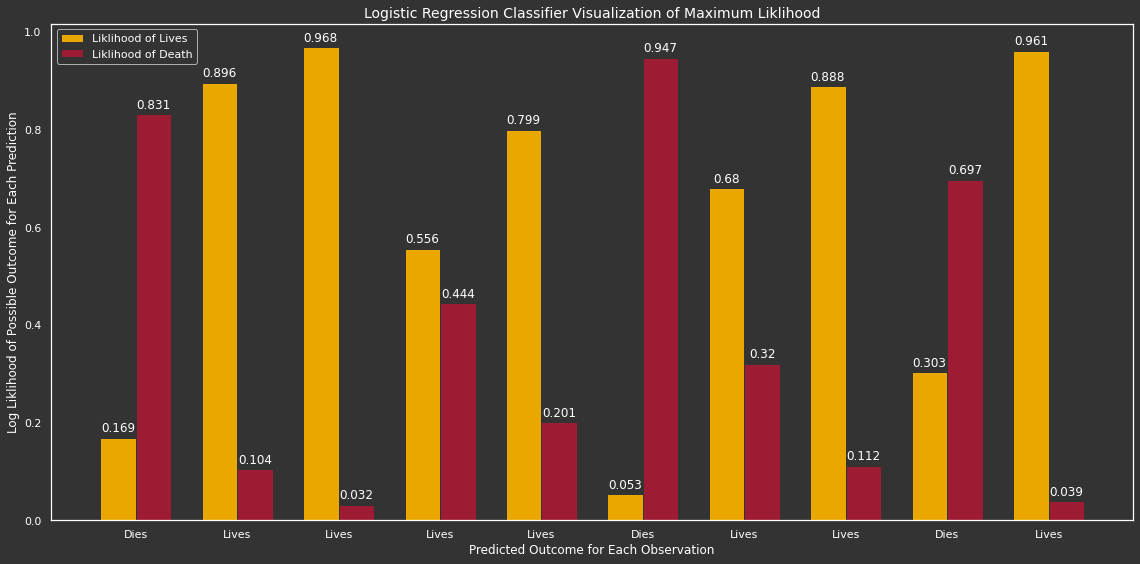

In [58]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap
sns.set(rc={'axes.facecolor':'#333333', 'figure.facecolor':'#333333'})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'montserrat'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor']= 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

plt.rcParams['patch.edgecolor'] = '#333333'

labels = Chartdf[0:10]['predictedoutcome'].astype(str)
labels = [ '\n'.join(wrap(l, 12)) for l in labels ]

men_means = Chartdf[0:10]['live'].round(3)
women_means = Chartdf[0:10]['die'].round(3)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))

rects1 = ax.bar(x - width/2, men_means, width, label='Liklihood of Lives',color=['#EAA700'])
rects2 = ax.bar(x + width/2, women_means, width, label='Liklihood of Death',color=['#9E1B34'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Log Liklihood of Possible Outcome for Each Prediction')
ax.set_xlabel('Predicted Outcome for Each Observation')
ax.set_title('Logistic Regression Classifier Visualization of Maximum Liklihood',size=14)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.grid(False)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
#fig.savefig('ODMAP_Lvl2UsersLoginsCountFinal.png',transparent=False,dpi=100,bbox_inches='tight', facecolor=('#333333'))

In [59]:
#Generate a confusion matrix for the test data and predictions for the above model. code from class examples
cm = metrics.confusion_matrix(Y_test, predictions)

In the below confusion matrix we see an overall prediction accuracy of approximately 74%. False posative outcomes outweigh false negative outcomes at 15 vs 9.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


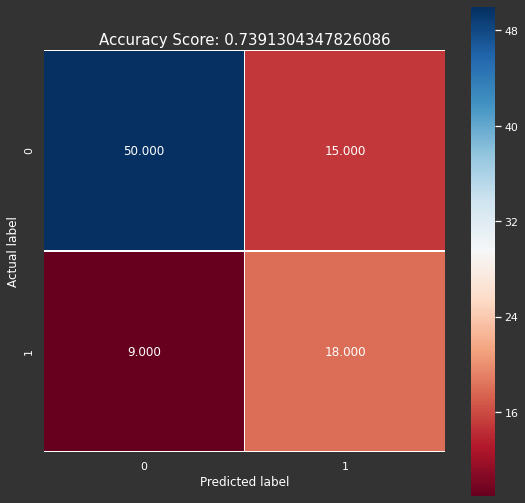

In [60]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'RdBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

In [30]:
#Correlation scatter matrix used to pick out correlations between factors - All Crime

from pandas.plotting import scatter_matrix

#scatter_matrix(SimpleBinary, alpha=0.9, figsize=(14, 14), diagonal='kde')


We will down attempt to do some feature selection, removing potential noise form uncorrelated variables. In this first step those features with a correlation of less than .1 to the target feature are removed from the dataframe.

In [61]:
#remove values with correlation less than .1
Corrs=SimpleBinary[SimpleBinary.columns].corr()['Target']
remove2=Corrs[np.sqrt(Corrs**2) < 0.1].index

In [62]:
remove2

Index(['Age', 'rectal temperature', 'respiratory rate', 'total protein'], dtype='object')

In [63]:
SimpleBinary2=SimpleBinary.drop(list(remove2), axis=1)
SimpleBinary2

,surgery,pulse,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain a subjective judgement of the horses pain level,peristalsis,abdominal distension,packed cell volume,outcome,surgical lesion,type of lesion,Target,location of lesion
0,2,66,3,3,0,2,5,4,4,45.0,2,2,1,1,1
1,1,88,0,0,4,1,3,4,2,50.0,3,2,2,1,2
2,2,40,1,1,3,1,3,3,1,33.0,1,2,0,0,0
3,1,164,4,1,6,2,2,4,4,48.0,2,1,2,1,2
4,2,104,0,0,6,2,0,0,0,74.0,2,2,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2,60,1,1,3,1,4,2,2,40.0,1,1,2,0,3
364,2,42,1,1,1,1,1,3,1,36.0,1,2,1,0,4
365,1,60,1,1,2,1,2,1,1,44.0,3,1,2,1,2
366,2,42,3,0,3,1,1,1,1,37.0,1,2,1,0,3


We will now refit the model with these variables removed and reassess its performance.

In [70]:
X = SimpleBinary2.drop(columns= ['outcome','Target'])
#X = pd.get_dummies(X)
X.columns

Index(['surgery', 'pulse', 'temperature of extremities', 'peripheral pulse',
       'mucous membranes', 'capillary refill time',
       'pain  a subjective judgement of the horses pain level', 'peristalsis',
       'abdominal distension', 'packed cell volume', 'surgical lesion',
       'type of lesion', 'location of lesion'],
      dtype='object')

In [71]:
y = SimpleBinary2.Target ## creating target values
y.value_counts()

0    227
1    141
Name: Target, dtype: int64

In [74]:

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .25, random_state = 40)

logreg = LogisticRegression(penalty = 'none', max_iter= 10000,random_state = 40) ## instantiate

logreg.fit(X_train, Y_train) ## fit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=40, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
## Accuracy Scores
trainscore = logreg.score(X_train,Y_train)
testscore = logreg.score(X_test,Y_test)

print(trainscore)
print(testscore)

0.7789855072463768
0.7282608695652174


In [76]:
predictions = logreg.predict(X_test)

In [77]:
predictions

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0], dtype=int64)

In [78]:
cm = metrics.confusion_matrix(Y_test, predictions)

We actually observe a slightly reduced test accuracy based on the removal of the above variables. One additional prediction becomes a false posative. 

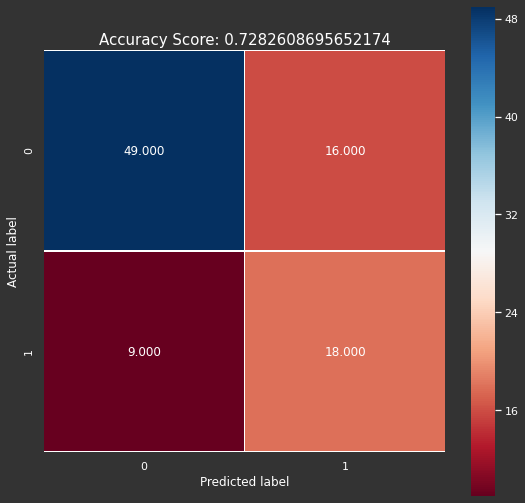

In [81]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'RdBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(testscore)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

Now we will attempt feature selection using the lasso meathod, as opposed to simply discarding the variables with low simple correlation to target.

In [84]:
X = SimpleBinary.drop(columns= ['outcome','Target'])
X.columns

Index(['surgery', 'Age', 'rectal temperature', 'pulse', 'respiratory rate',
       'temperature of extremities', 'peripheral pulse', 'mucous membranes',
       'capillary refill time',
       'pain  a subjective judgement of the horses pain level', 'peristalsis',
       'abdominal distension', 'packed cell volume', 'total protein',
       'surgical lesion', 'type of lesion', 'location of lesion'],
      dtype='object')

In [85]:
y = SimpleBinary.Target ## creating target values
y.value_counts()

0    227
1    141
Name: Target, dtype: int64

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .25, random_state = 40)

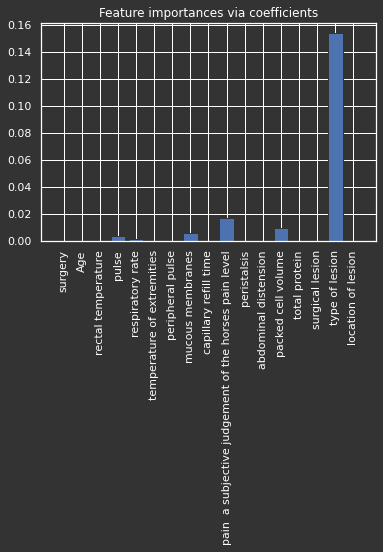

array([0.        , 0.        , 0.        , 0.00307049, 0.00098978,
       0.        , 0.        , 0.00554444, 0.        , 0.01655608,
       0.        , 0.        , 0.00937523, 0.        , 0.        ,
       0.15343647, 0.        ])

In [87]:
lasso = LassoCV().fit(X_train, Y_train)
importance = np.abs(lasso.coef_)
#feature_names = np.array(X_train.values)
plt.bar(height=importance, x=X_train.columns)
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.show()
importance

In [88]:
LassoOutcome = {'feature':X_train.columns,'importance':list(importance)}
LassoOutcome = pd.DataFrame(LassoOutcome)
LassoOutcome

,feature,importance
0,surgery,0.000000
1,Age,0.000000
2,rectal temperature,0.000000
3,pulse,0.003070
4,respiratory rate,0.000990
5,temperature of extremities,0.000000
6,peripheral pulse,0.000000
7,mucous membranes,0.005544
8,capillary refill time,0.000000
9,pain a subjective judgement of the horses pai...,0.016556


In [92]:
#remove values with importance of 0
Lassoremove=LassoOutcome[LassoOutcome['importance'] == 0]
list(Lassoremove['feature'])

['surgery',
 'Age',
 'rectal temperature',
 'temperature of extremities',
 'peripheral pulse',
 'capillary refill time',
 'peristalsis',
 'abdominal distension',
 'total protein',
 'surgical lesion',
 'location of lesion']

In [94]:
SimpleBinary3=SimpleBinary.drop(list(Lassoremove['feature']), axis=1)
SimpleBinary3

,pulse,respiratory rate,mucous membranes,pain a subjective judgement of the horses pain level,packed cell volume,outcome,type of lesion,Target
0,66,28,0,5,45.0,2,1,1
1,88,20,4,3,50.0,3,2,1
2,40,24,3,3,33.0,1,0,0
3,164,84,6,2,48.0,2,2,1
4,104,35,6,0,74.0,2,3,1
...,...,...,...,...,...,...,...,...
363,60,30,3,4,40.0,1,2,0
364,42,40,1,1,36.0,1,1,0
365,60,12,2,2,44.0,3,2,1
366,42,12,3,1,37.0,1,1,0


Now lets retrain the classifier model using these features.

In [95]:
X = SimpleBinary3.drop(columns= ['outcome','Target'])
#X = pd.get_dummies(X)
X.columns

Index(['pulse', 'respiratory rate', 'mucous membranes',
       'pain  a subjective judgement of the horses pain level',
       'packed cell volume', 'type of lesion'],
      dtype='object')

In [96]:
y = SimpleBinary3.Target ## creating target values
y.value_counts()

0    227
1    141
Name: Target, dtype: int64

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .25, random_state = 40)

logreg = LogisticRegression(penalty = 'none', max_iter= 10000,random_state = 40) ## instantiate

logreg.fit(X_train, Y_train) ## fit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=40, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
## Accuracy Scores
trainscore = logreg.score(X_train,Y_train)
testscore = logreg.score(X_test,Y_test)

print(trainscore)
print(testscore)

0.782608695652174
0.7391304347826086


In [99]:
predictions = logreg.predict(X_test)

In [100]:
predictions

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0], dtype=int64)

In [101]:
cm = metrics.confusion_matrix(Y_test, predictions)

We now observe a test accuracy equal to that of the baseline with the removal of the above variables identified by the lasso regression. While no improvement was noted, excluding uneeded features makes for a better model and we will now use this dataset moving forward for parameter testing and final evaluation.

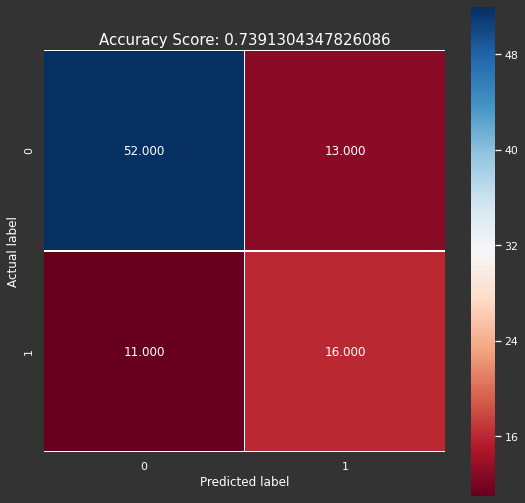

In [103]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'RdBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(testscore)
plt.title(all_sample_title, size = 15);
plt.savefig('ConfusionMatrix_Lasso.png')
plt.show()

Validating the model via Cross Validation, k folds used as dataset isnt huge orig run time * k times. this is a more accurate measurment of model accracy
Source used for assistance in coding:https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb

In [105]:
#Below is a visualization of how the folds used in this method will be evaluated, splitting out the test and train data for each fold
kf = KFold(n_splits=5, shuffle=False).split(range(len(SimpleBinary3)))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 

In [106]:
# 10-fold cross-validation 
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(scores)

[0.86486486 0.83783784 0.72972973 0.75675676 0.81081081 0.75675676
 0.83783784 0.64864865 0.77777778 0.69444444]


In [107]:
#The scores for these ten folds are now averaged to come up with the final score for the model
print(scores.mean())

0.7715465465465465


## Now that we have a more accurate measure of the accuracy of our model, we can use the follwing functions to fine tune the parameters of the logistic regression classifier to obtain the best possible results from our model

Cfloat, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

In [108]:
Cvals=[0.001,0.01,0.1,1,10,100]
k_scores = []
for c in Cvals:
    logreg = LogisticRegression(max_iter= 10000,random_state = 40,C=c)

    scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7256006006006006, 0.7471471471471471, 0.7716216216216216, 0.7716216216216216, 0.7715465465465465, 0.7715465465465465]


In [110]:
#Select the C value with the best outcome
BestC=Cvals[k_scores.index(max(k_scores))]

solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem.

In [111]:
solve = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
k_scores = []
for s in solve:
    logreg = LogisticRegression(max_iter= 1000000,random_state = 40,solver=s,C=BestC) ## instantiate

    scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7716216216216216, 0.7716216216216216, 0.7497747747747747, 0.7497747747747747, 0.7470720720720722]


In [112]:
#Select the solver with the best outcome
BestS=solve[k_scores.index(max(k_scores))]

We see an improved outcome from the original default parameters set by the model, from 74 to 77

In [113]:
# 10-fold cross-validation using the parameters which the above functions produced
logreg = LogisticRegression(max_iter= 1000000,random_state = 40,C=BestC,solver=BestS) ## instantiate
logreg.fit(X_train, Y_train) ## fit
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.7716216216216216


One final way to measure the true effectiveness of our model is to consider the distribution of the possible outcomes (life or death). Does out model predict simply based on the numerical split/distribution within the data, or is it more accurate than that?

In [199]:
#Checking null accuracy
print(Y_test.value_counts().head(2) / len(Y_test))

0    0.706522
1    0.293478
Name: Target, dtype: float64


In [198]:
y.value_counts().head(2) / len(y)

0    0.616848
1    0.383152
Name: Target, dtype: float64

A prediction of both outcomes does not simply follow the distribtuon percentage of the targets within the dataset, a posative outcome.

The final manual parameter which we could adjust to achieve greater accuracy would be to alter the final prediction output of the model based on the liklihood output. In other words, a liklihood greater than the defualt .5 can be specified when making the final prediction off of the proability array. This is the final parameter which should be considered and only once the final model and features have been selected. It is often a matter of domain knowledge. For us we will see if weighting a "death" outcome can allow us to reduce the number of false negative results. erring on the side of caution for the model used by veteranarians so that they be more lean towards more aggressive medical intervention when death could be a result of the evaluation of the horse.

In [200]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [201]:
print('True:', Y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0]
Pred: [1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0]


In [202]:
#Checking Distribution

In [322]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

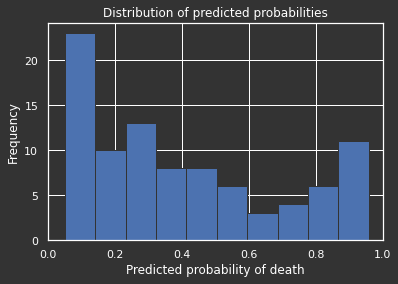

In [323]:
plt.hist(y_pred_prob, bins=10)
plt.xlim(0, 1)
plt.title('Distribution of predicted probabilities')
plt.xlabel('Predicted probability of death')
plt.ylabel('Frequency')

In [292]:
PossibleWeights=np.arange(.4, .6, 0.01).tolist()

In [293]:
BestAccuracy=[]
for i in range(len(PossibleWeights)):
    BestAccuracy.append(metrics.accuracy_score(Y_test, binarize([y_pred_prob], PossibleWeights[i])[0]))

In [294]:
Bestweight=PossibleWeights[BestAccuracy.index(max(BestAccuracy))]
Bestweight

0.5400000000000001

In [295]:
lowfalseneg=[]
for i in range(len(PossibleWeights)):
    lowfalseneg.append(metrics.confusion_matrix(Y_test,binarize([y_pred_prob], PossibleWeights[i])[0])[1][0])

In [296]:
LowestFalseNegative=PossibleWeights[lowfalseneg.index(min(lowfalseneg))]
LowestFalseNegative

0.4

In [297]:
print('Lowest false negative count possible: ' + str(min(lowfalseneg)))

Lowest false negative count possible: 8


In [307]:
y_pred_classAccuracy=binarize([y_pred_prob], Bestweight)

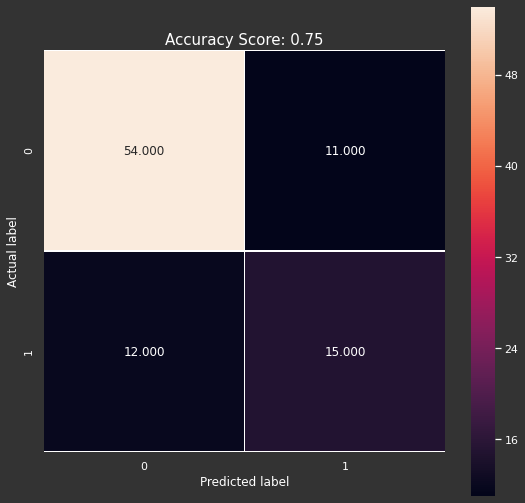

In [308]:
plt.figure(figsize=(9,9))
sns.heatmap((metrics.confusion_matrix(Y_test, y_pred_classAccuracy[0])), annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format((metrics.accuracy_score(Y_test, y_pred_classAccuracy[0])))
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

In [318]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])
evaluate_threshold(Bestweight)


Sensitivity: 0.5555555555555556
Specificity: 0.8307692307692307


In [309]:
y_pred_classlowfalseneg=binarize([y_pred_prob], LowestFalseNegative)

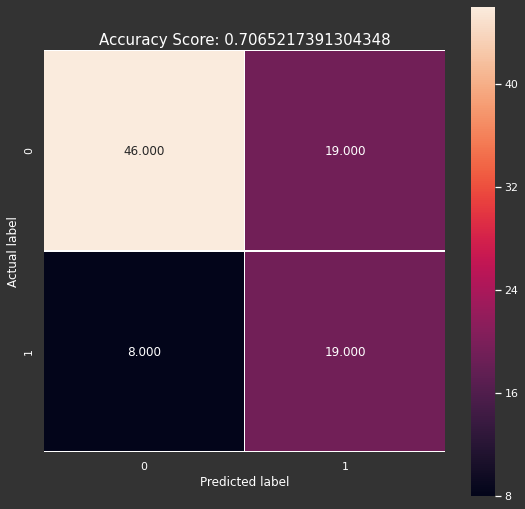

In [311]:
plt.figure(figsize=(9,9))
sns.heatmap((metrics.confusion_matrix(Y_test, y_pred_classlowfalseneg[0])), annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format((metrics.accuracy_score(Y_test, y_pred_classlowfalseneg[0])))
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

In [319]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])
evaluate_threshold(LowestFalseNegative)


Sensitivity: 0.7037037037037037
Specificity: 0.7538461538461538


In [320]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])
evaluate_threshold(.5)


Sensitivity: 0.5925925925925926
Specificity: 0.8


Not finding any major gains in accuracy and losing a good bit of accuracy to acheive the lowest possible outcome of false negatives, we will refrain from modfying the model in this way. The default split of .5 will be retained

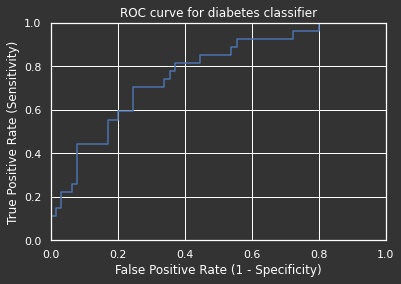

In [324]:
#Using the ROC curve to optimize, balancing specificity and sensitivity
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [325]:
#Checking area under curve as alternative to classification accuracy 
print(metrics.roc_auc_score(Y_test, y_pred_prob))

0.7743589743589743


In [326]:
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.8264229249011856

Sensitivity: 0.5925925925925926
Specificity: 0.8


# Surgical Outcome

In [87]:
SimpleBinary=df
SimpleBinary['surgical lesion'].value_counts()

1    232
2    136
Name: surgical lesion, dtype: int64

In [88]:
#SimpleBinary.loc[SimpleBinary['Disease'].str.contains('Drug Reaction', na=False), 'Disease'] = 1
#SimpleBinary.loc[~SimpleBinary['Disease'].str.contains('Drug Reaction', na=False), 'Disease'] = 0

#SimpleBinary['Disease'].replace(to_replace ='Drug Reaction', value =1,inplace=True)
#SimpleBinary['Disease'].replace(to_replace !='Drug Reaction', value =0,inplace=True)

SimpleBinary['Target'] = SimpleBinary['surgical lesion']

SimpleBinary['Target'].value_counts()
SimpleBinary=SimpleBinary.astype(float)

In [89]:
X = SimpleBinary.drop(columns= ['surgical lesion','Target'])
#X = pd.get_dummies(X)
X.columns

Index(['surgery', 'Age', 'rectal temperature', 'pulse', 'respiratory rate',
       'temperature of extremities', 'peripheral pulse', 'mucous membranes',
       'capillary refill time',
       'pain  a subjective judgement of the horses pain level', 'peristalsis',
       'abdominal distension', 'packed cell volume', 'total protein',
       'outcome', 'type of lesion', 'location of lesion'],
      dtype='object')

In [90]:
y = SimpleBinary.Target ## creating target values
y.value_counts()

1.0    232
2.0    136
Name: Target, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression ## import model


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .15, random_state = 40)

logreg = LogisticRegression(penalty = 'none', max_iter= 10000,random_state = 40) ## instantiate

logreg.fit(X_train, Y_train) ## fit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=40, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
## Accuracy Scores
score = logreg.score(X_test,Y_test)
score

0.9107142857142857

In [93]:
predictions = logreg.predict(X_test)

In [94]:
predictions

array([1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2.,
       1., 1., 1., 1., 1.])

In [95]:
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)

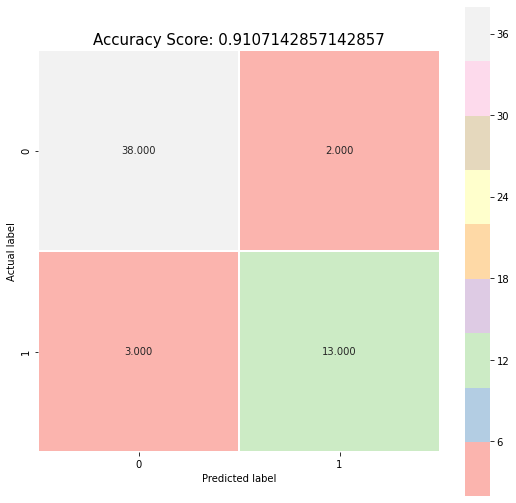

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

Location of liesion

In [170]:
SimpleBinary=df
SimpleBinary[24].value_counts()

0        67
3111     41
3205     35
2208     23
2205     17
         ..
8405      1
4207      1
21110     1
3207      1
11400     1
Name: 24, Length: 63, dtype: int64

In [171]:
SimpleBinary[24]=SimpleBinary[24].astype(str).str[:1]

In [172]:
#SimpleBinary=SimpleBinary[SimpleBinary[22] != '?']
SimpleBinary.replace('?',0,inplace=True)


In [173]:
SimpleBinary.shape

(368, 29)

In [174]:
#SimpleBinary.loc[SimpleBinary['Disease'].str.contains('Drug Reaction', na=False), 'Disease'] = 1
#SimpleBinary.loc[~SimpleBinary['Disease'].str.contains('Drug Reaction', na=False), 'Disease'] = 0

#SimpleBinary['Disease'].replace(to_replace ='Drug Reaction', value =1,inplace=True)
#SimpleBinary['Disease'].replace(to_replace !='Drug Reaction', value =0,inplace=True)

SimpleBinary['Target'] = SimpleBinary[24]

SimpleBinary['Target'].value_counts()
SimpleBinary=SimpleBinary.astype(float)

In [175]:
X = SimpleBinary.drop(columns= [24,'Target'])
#X = pd.get_dummies(X)
X.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 25, 26, 27],
      dtype='object')

In [176]:
y = SimpleBinary.Target ## creating target values
y.value_counts()

3.0    108
2.0     96
0.0     67
4.0     34
1.0     18
7.0     16
5.0     14
6.0      8
8.0      4
9.0      3
Name: Target, dtype: int64

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression ## import model


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .15, random_state = 40)

logreg = LogisticRegression(penalty = 'none', max_iter= 10000,random_state = 40) ## instantiate

logreg.fit(X_train, Y_train) ## fit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=40, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [190]:
## Accuracy Scores
score = logreg.score(X_test,Y_test)
score

0.3392857142857143

In [191]:
predictions = logreg.predict(X_test)

In [192]:
predictions

array([3., 3., 3., 3., 3., 3., 3., 2., 2., 3., 3., 3., 3., 3., 2., 3., 3.,
       2., 2., 3., 3., 3., 2., 3., 3., 3., 2., 2., 2., 3., 3., 2., 3., 3.,
       3., 3., 3., 2., 2., 2., 3., 3., 3., 3., 2., 3., 3., 2., 3., 3., 3.,
       2., 3., 2., 3., 3.])

In [193]:
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)

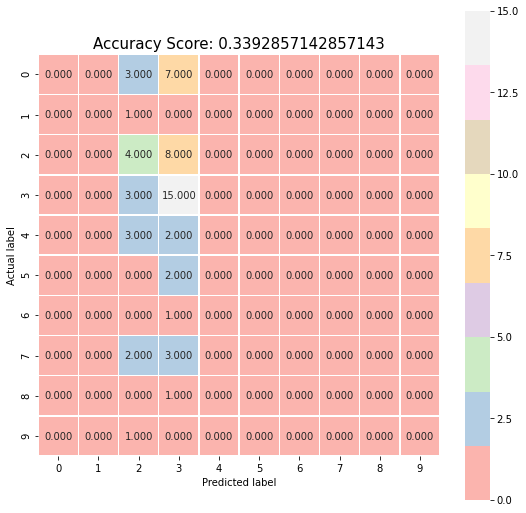

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()